# importing libs

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# importing derectories

In [2]:
train_dir = 'C:/Users/Jyoti Prakash Dhala/OneDrive/Desktop/brain_tumer_dataset/Training'
test_dir = 'C:/Users/Jyoti Prakash Dhala/OneDrive/Desktop/brain_tumer_dataset/Testing'

# generating data from jepg files

In [3]:
img_size = (224, 224)
batch_size = 32

In [4]:
datagen = ImageDataGenerator(rescale=1./255)

In [5]:

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.


In [6]:
test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1311 images belonging to 4 classes.


# converting to array of vectors

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))


In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model = Model(inputs=base_model.input, outputs=base_model.output)

In [10]:
train_features = model.predict(train_gen)
test_features = model.predict(test_gen)

D:\python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step


# training data and testing data

In [11]:
X_train = train_features.reshape(train_features.shape[0], -1)
y_train = train_gen.classes

X_test = test_features.reshape(test_features.shape[0], -1)
y_test = test_gen.classes

In [12]:
print(X_train.shape)
print(y_train.shape)

(5712, 25088)
(5712,)


# pca transform

In [13]:
pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# svc

In [14]:
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_pca, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
y_pred = svm.predict(X_test_pca)

In [16]:
print('accuracy:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred, average='macro'))
print('recall:',recall_score(y_test, y_pred, average='macro'))
print('f1_score:',f1_score(y_test, y_pred, average='macro'))

accuracy: 0.9557589626239512
precision: 0.954524402800265
recall: 0.9526089324618736
f1_score: 0.9528189445570208


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test, y_pred)

Text(45.72222222222221, 0.5, 'Actual')

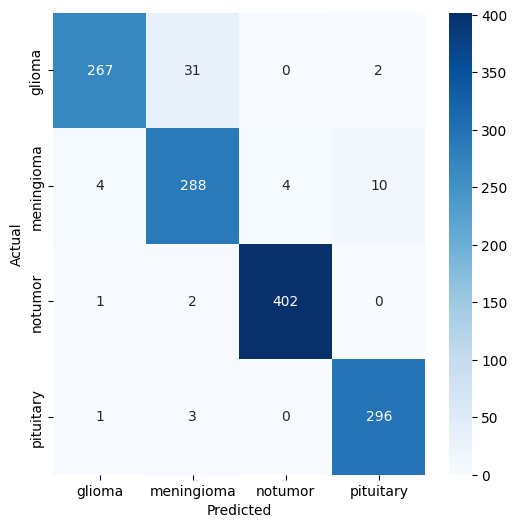

In [39]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# random forest

In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)

In [18]:
print('accuracy:',accuracy_score(y_test, y_pred_rf))
print('precision:',precision_score(y_test, y_pred_rf, average='macro'))
print('recall:',recall_score(y_test, y_pred_rf, average='macro'))
print('f1_score:',f1_score(y_test, y_pred_rf, average='macro'))

accuracy: 0.9336384439359268
precision: 0.9306040908661162
recall: 0.9280065359477124
f1_score: 0.9275867130752301


Text(45.72222222222221, 0.5, 'Actual')

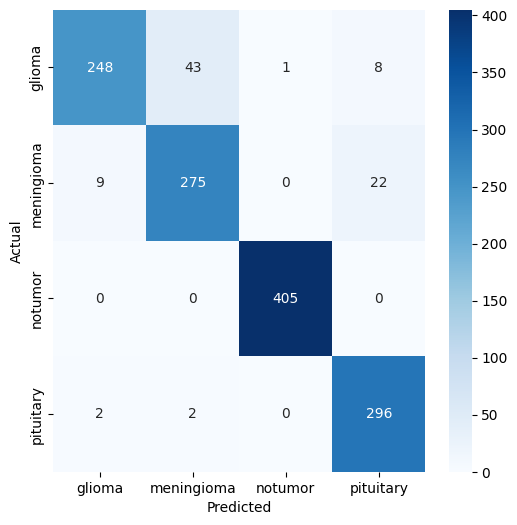

In [44]:
cm1 = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# logistic regration

In [19]:
lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)

D:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [20]:
print('accuracy:',accuracy_score(y_test, y_pred_lr))
print('precision:',precision_score(y_test, y_pred_lr, average='macro'))
print('recall:',recall_score(y_test, y_pred_lr, average='macro'))
print('f1_score:',f1_score(y_test, y_pred_lr, average='macro'))

accuracy: 0.9527078565980168
precision: 0.9491262239245419
recall: 0.9487581699346405
f1_score: 0.9488295580830572


Text(45.72222222222221, 0.5, 'Actual')

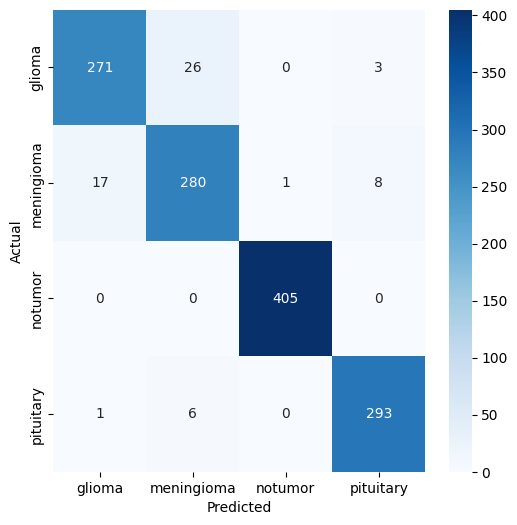

In [43]:
cm2 = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# xgboost

In [21]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss')
xgb_clf.fit(X_train_pca, y_train)
y_pred_xgb = xgb_clf.predict(X_test_pca)

In [22]:
print('accuracy:',accuracy_score(y_test, y_pred_xgb))
print('precision:',precision_score(y_test, y_pred_xgb, average='macro'))
print('recall:',recall_score(y_test, y_pred_xgb, average='macro'))
print('f1_score:',f1_score(y_test, y_pred_xgb, average='macro'))

accuracy: 0.9427917620137299
precision: 0.9391473180435999
recall: 0.9380228758169935
f1_score: 0.9380810443689792


Text(45.72222222222221, 0.5, 'Actual')

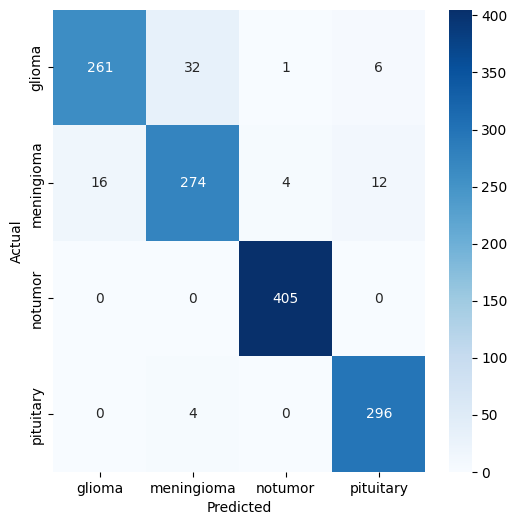

In [46]:
cm3 = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# knn


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

In [24]:
print('accuracy:',accuracy_score(y_test, y_pred_knn))
print('precision:',precision_score(y_test, y_pred_knn, average='macro'))
print('recall:',recall_score(y_test, y_pred_knn, average='macro'))
print('f1_score:',f1_score(y_test, y_pred_knn, average='macro'))

accuracy: 0.9153318077803204
precision: 0.9118177955660219
recall: 0.9118191721132898
f1_score: 0.9104893826224045


Text(45.72222222222221, 0.5, 'Actual')

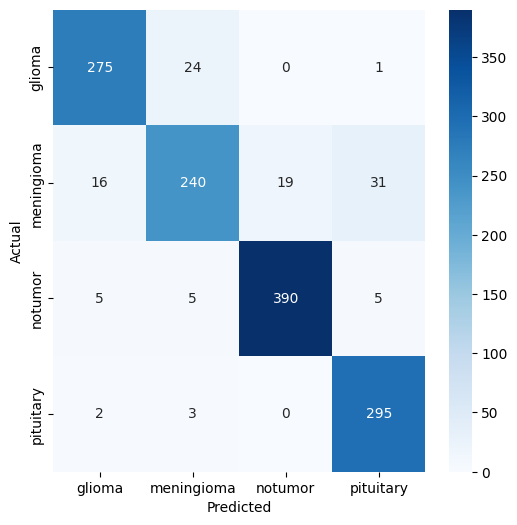

In [47]:
cm4 = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# lightbgm

In [25]:
lgb_clf = lgb.LGBMClassifier(objective='multiclass', num_class=4)
lgb_clf.fit(X_train_pca, y_train)
y_pred_light = lgb_clf.predict(X_test_pca)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127500
[LightGBM] [Info] Number of data points in the train set: 5712, number of used features: 500
[LightGBM] [Info] Start training from score -1.464180
[LightGBM] [Info] Start training from score -1.450646
[LightGBM] [Info] Start training from score -1.275695
[LightGBM] [Info] Start training from score -1.366190


D:\python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [26]:
print('accuracy:',accuracy_score(y_test, y_pred_light))
print('precision:',precision_score(y_test, y_pred_light, average='macro'))
print('recall:',recall_score(y_test, y_pred_light, average='macro'))
print('f1_score:',f1_score(y_test, y_pred_light, average='macro'))

accuracy: 0.9435545385202135
precision: 0.9401031566472744
recall: 0.9388071895424837
f1_score: 0.9387587628816572


Text(45.72222222222221, 0.5, 'Actual')

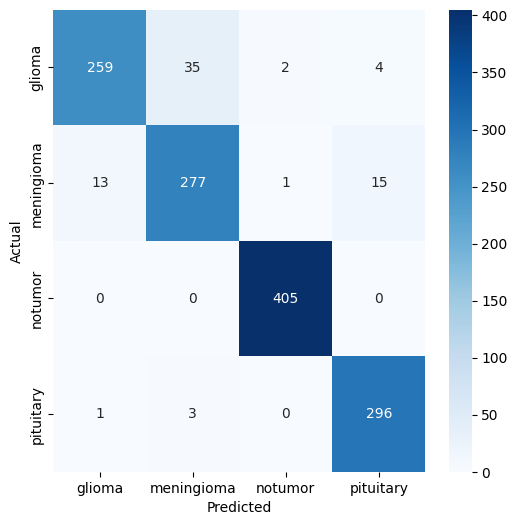

In [48]:
cm5 = confusion_matrix(y_test, y_pred_light)
plt.figure(figsize=(6,6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# creating objects 

In [32]:
import joblib
from tensorflow.keras.models import load_model
import json

In [28]:
model.save("vgg16_model.h5")

In [29]:
joblib.dump(pca,"PCA_N_reduce.joblib")

['PCA_N_reduce.joblib']

In [30]:
joblib.dump(svm,"SVC_model.joblib")

['SVC_model.joblib']

In [33]:
with open("class_indices.json", "w") as f:
    json.dump(train_gen.class_indices, f)

In [34]:
joblib.dump(lr,"logistic_regration.joblib")

['logistic_regration.joblib']